<a href="https://colab.research.google.com/github/SnehaTanwar006/Face_Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!unzip database_face.zip

Archive:  database_face.zip
   creating: database_face/
   creating: database_face/Per_1/
   creating: database_face/Per_2/
   creating: database_face/test/
  inflating: database_face/Per_1/1..jpg  
  inflating: database_face/Per_1/2..jpg  
  inflating: database_face/Per_1/3..jpg  
  inflating: database_face/Per_1/4..jpg  
  inflating: database_face/Per_1/5..jpg  
  inflating: database_face/Per_1/6..jpg  
  inflating: database_face/Per_1/7..jpg  
  inflating: database_face/Per_1/8..jpg  
  inflating: database_face/Per_2/1.jpg  
  inflating: database_face/Per_2/2.jpg  
  inflating: database_face/Per_2/3.jpg  
  inflating: database_face/Per_2/4.jpg  
  inflating: database_face/Per_2/5.jpg  
  inflating: database_face/Per_2/6.jpg  
  inflating: database_face/Per_2/7.jpg  
  inflating: database_face/Per_2/8.jpg  
  inflating: database_face/test/test_1 (1).jpg  
  inflating: database_face/test/test_1 (2).jpg  
  inflating: database_face/test/test_1 (3).jpg  
  inflating: database_face/test/

In [37]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [38]:
def load_dataset(data_dir, img_size=(100, 100)):
    """
    Loads images from subdirectories of data_dir where each subdirectory (e.g. 'Per_1', 'Per_2', 'Per_3')
    represents a class. Each image is converted to grayscale, resized, and flattened.

    Args:
        data_dir (str): Path to the dataset directory.
        img_size (tuple): Target image size (width, height) for resizing.

    Returns:
        X (np.ndarray): Array of flattened image vectors.
        y (np.ndarray): Array of corresponding class labels.
    """
    X = []
    y = []
    # Loop over each subfolder (class)
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir) and label.startswith("Per"):
            print(f"Loading images from class: {label}")
            for file in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file)
                # Read the image using OpenCV
                img = cv2.imread(file_path)
                if img is None:
                    continue  # Skip files that cannot be read
                # Convert to grayscale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Resize to a consistent size (adjust as needed)
                resized = cv2.resize(gray, img_size)
                # Flatten the image to create a feature vector
                X.append(resized.flatten())
                y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y


In [39]:
def load_test_images(test_dir, img_size=(100, 100)):
    """
    Loads test images from the specified test folder.
    Each image is converted to grayscale, resized, and flattened.

    Args:
        test_dir (str): Path to the test images directory.
        img_size (tuple): Target image size for resizing.

    Returns:
        X_test (np.ndarray): Array of flattened test image vectors.
        image_names (list): List of test image file names.
    """
    X_test = []
    image_names = []
    for file in os.listdir(test_dir):
        file_path = os.path.join(test_dir, file)
        img = cv2.imread(file_path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, img_size)
        X_test.append(resized.flatten())
        image_names.append(file)
    X_test = np.array(X_test)
    return X_test, image_names

In [40]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the paths (adjust these paths if necessary)
data_dir = "./database_face"  # This directory should contain Per_1, Per_2 folders.
test_dir = os.path.join(data_dir, "test")

# Define the target image size (width, height)
img_size = (100, 100)  # Adjust based on your dataset

# Load training images and their labels
X, y = load_dataset(data_dir, img_size)

# Convert X and y into a DataFrame
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y, columns=["Label"])

# Display DataFrames in Jupyter Notebook
from IPython.display import display
display(df_X)
display(df_y)

Loading images from class: Per_2
Loading images from class: Per_1


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,66,63,65,56,68,53,47,55,50,50,...,41,40,39,41,41,38,39,42,39,41
1,61,63,57,58,49,47,56,58,49,62,...,39,40,42,40,41,38,39,37,39,41
2,51,48,50,51,51,49,47,47,47,45,...,38,40,40,40,41,38,37,40,39,41
3,66,71,60,56,58,62,63,55,58,51,...,41,42,44,41,45,44,44,45,46,45
4,58,67,70,69,67,62,61,63,63,53,...,47,48,47,48,47,47,49,49,49,49
5,62,60,59,58,56,58,57,60,58,49,...,40,38,38,41,40,40,40,38,40,41
6,53,56,55,51,55,51,57,50,56,48,...,42,42,43,43,43,45,43,45,44,41
7,60,56,62,55,54,57,54,56,57,47,...,41,37,39,37,38,40,37,40,40,41
8,30,31,31,29,20,24,29,30,26,26,...,71,81,73,69,68,67,78,78,77,74
9,23,24,24,26,27,25,26,26,26,26,...,62,68,69,74,75,71,70,74,77,77


,Label
0,Per_2
1,Per_2
2,Per_2
3,Per_2
4,Per_2
5,Per_2
6,Per_2
7,Per_2
8,Per_1
9,Per_1


In [41]:
# Apply PCA for feature extraction.
n_components = 5
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X)

# Convert PCA-transformed data into DataFrame
df_X_pca = pd.DataFrame(X_pca)
display(df_X_pca)

,0,1,2,3,4
0,-1.116839,-0.535121,-0.039803,-0.660979,-0.210672
1,-0.588627,0.146244,-0.572725,1.741526,0.625039
2,-1.143712,-0.626873,-0.159793,-1.061875,-0.227654
3,-1.025605,0.956490,-0.362425,0.926755,0.728058
4,-0.774160,-1.567993,-0.925861,-0.757998,-0.674779
5,-0.979908,0.287728,1.342009,-0.133567,-0.279917
6,-1.050514,0.362558,-1.114370,1.369995,0.337524
7,-0.939778,0.389737,1.966615,-0.493447,-0.477289
8,0.849185,-1.211533,-0.230925,-1.096935,0.099935
9,0.867740,0.811871,0.511066,-0.178918,0.054597


In [42]:
# Load test images
X_test, image_names = load_test_images(test_dir, img_size)

# Convert test data into DataFrame
df_X_test = pd.DataFrame(X_test)
display(df_X_test)

# Transform test images using the PCA model trained on the training images
X_test_pca = pca.transform(X_test)

# Convert test PCA data into DataFrame
df_X_test_pca = pd.DataFrame(X_test_pca)
display(df_X_test_pca)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,58,67,70,69,67,62,61,63,63,53,...,47,48,47,48,47,47,49,49,49,49
1,27,30,28,27,28,26,26,23,25,26,...,79,75,76,54,74,80,81,79,79,75
2,66,63,65,56,68,53,47,55,50,50,...,41,40,39,41,41,38,39,42,39,41
3,23,24,24,26,27,25,26,26,26,26,...,62,68,69,74,75,71,70,74,77,77
4,30,31,31,29,20,24,29,30,26,26,...,71,81,73,69,68,67,78,78,77,74
5,62,60,59,58,56,58,57,60,58,49,...,40,38,38,41,40,40,40,38,40,41


,0,1,2,3,4
0,-0.774160,-1.567993,-0.925861,-0.757998,-0.674779
1,0.881056,1.286115,1.482004,-0.272603,0.165823
2,-1.116839,-0.535121,-0.039803,-0.660979,-0.210672
3,0.867740,0.811871,0.511066,-0.178918,0.054597
4,0.849185,-1.211533,-0.230925,-1.096935,0.099935
5,-0.979908,0.287728,1.342009,-0.133567,-0.279917


Please upload an image to classify:


Saving 2..jpg to 2. (2).jpg


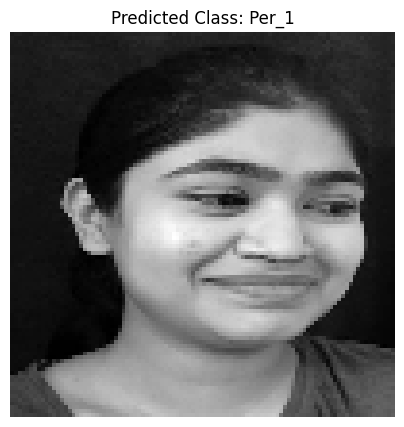

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files  # For uploading images

# Train KNN classifier on PCA-transformed training data
knn = KNeighborsClassifier(n_neighbors=3)  # Adjust k as needed
knn.fit(X_pca, y)

# Function to load and preprocess a single test image
def load_image(image_path, img_size):
    """Load, resize, and flatten the image into a 1D array."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, img_size)  # Resize to match training size
    return img.flatten(), img  # Return flattened image and original image

# Ask user to upload an image for classification
print("Please upload an image to classify:")
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load and process the input image
test_image_flattened, test_image_original = load_image(image_path, img_size)
test_image_pca = pca.transform([test_image_flattened])

# Predict the class
predicted_class = knn.predict(test_image_pca)[0]

# Display the uploaded image with predicted class
plt.figure(figsize=(5, 5))
plt.imshow(test_image_original, cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()